# Table of Contents
<a id="toc"></a>
- [1. Project Description](#1)
- [2. Import Necssaries Libraries](#2)
- [3. Visualize Bird Species](#3)
- [4. Data Preprocessing](#4)
- [5. Spliting the data into Training and Testing Data](#5)
- [6. Normalization](#6)
- [7. Label Binarizer](#7)
- [8. ANN](#8)
- [9. CNN](#9)
- [10. Evaluation](#10)

# Project Description

Bird Species Classification<br>
In this project, I will create a model which will be able to predict species of the bird.<br>
this is multiclass classification problem, the classes in the data:<br><br>
**1 - American Goldfinch**<br><br>
<img src = 'Data/Bird Speciees Dataset/AMERICAN GOLDFINCH/001.jpg'><br><br>
**2 - Barn Owl**<br><br>
<img src = 'Data/Bird Speciees Dataset/BARN OWL/002.jpg'><br><br>
**3 - Carmine Bee-Eater**<br><br>
<img src = 'Data/Bird Speciees Dataset/CARMINE BEE-EATER/003.jpg'><br><br>
**4 - Downy Woodpecker**<br><br>
<img src = 'Data/Bird Speciees Dataset/DOWNY WOODPECKER/001.jpg'><br><br>
**5 - Emperor Penguin**<br><br>
<img src = 'Data/Bird Speciees Dataset/EMPEROR PENGUIN/001.jpg'><br><br>
**6 - Flamingo**<br><br>
<img src = 'Data/Bird Speciees Dataset/FLAMINGO/001.jpg'><br><br>

# Import Necessaries Libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
from matplotlib.image import imread
import seaborn as sns
import cv2
import random
from os import listdir

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import  LabelBinarizer

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks

In [32]:
path = "Data/Bird Speciees Dataset/AMERICAN GOLDFINCH"

In [33]:
listdir(path)

['001.jpg',
 '002.jpg',
 '003.jpg',
 '004.jpg',
 '005.jpg',
 '006.jpg',
 '007.jpg',
 '008.jpg',
 '009.jpg',
 '010.jpg',
 '011.jpg',
 '012.jpg',
 '013.jpg',
 '014.jpg',
 '015.jpg',
 '016.jpg',
 '017.jpg',
 '018.jpg',
 '019.jpg',
 '020.jpg',
 '021.jpg',
 '022.jpg',
 '023.jpg',
 '024.jpg',
 '025.jpg',
 '026.jpg',
 '027.jpg',
 '028.jpg',
 '029.jpg',
 '030.jpg',
 '031.jpg',
 '032.jpg',
 '033.jpg',
 '034.jpg',
 '035.jpg',
 '036.jpg',
 '037.jpg',
 '038.jpg',
 '039.jpg',
 '040.jpg',
 '041.jpg',
 '042.jpg',
 '043.jpg',
 '044.jpg',
 '045.jpg',
 '046.jpg',
 '047.jpg',
 '048.jpg',
 '049.jpg',
 '050.jpg',
 '051.jpg',
 '052.jpg',
 '053.jpg',
 '054.jpg',
 '055.jpg',
 '056.jpg',
 '057.jpg',
 '058.jpg',
 '059.jpg',
 '060.jpg',
 '061.jpg',
 '062.jpg',
 '063.jpg',
 '064.jpg',
 '065.jpg',
 '066.jpg',
 '067.jpg',
 '068.jpg',
 '069.jpg',
 '070.jpg',
 '071.jpg',
 '072.jpg',
 '073.jpg',
 '074.jpg',
 '075.jpg',
 '076.jpg',
 '077.jpg',
 '078.jpg',
 '079.jpg',
 '080.jpg',
 '081.jpg',
 '082.jpg',
 '083.jpg',
 '08

<a id='3'></a>
# Visualize Bird Species

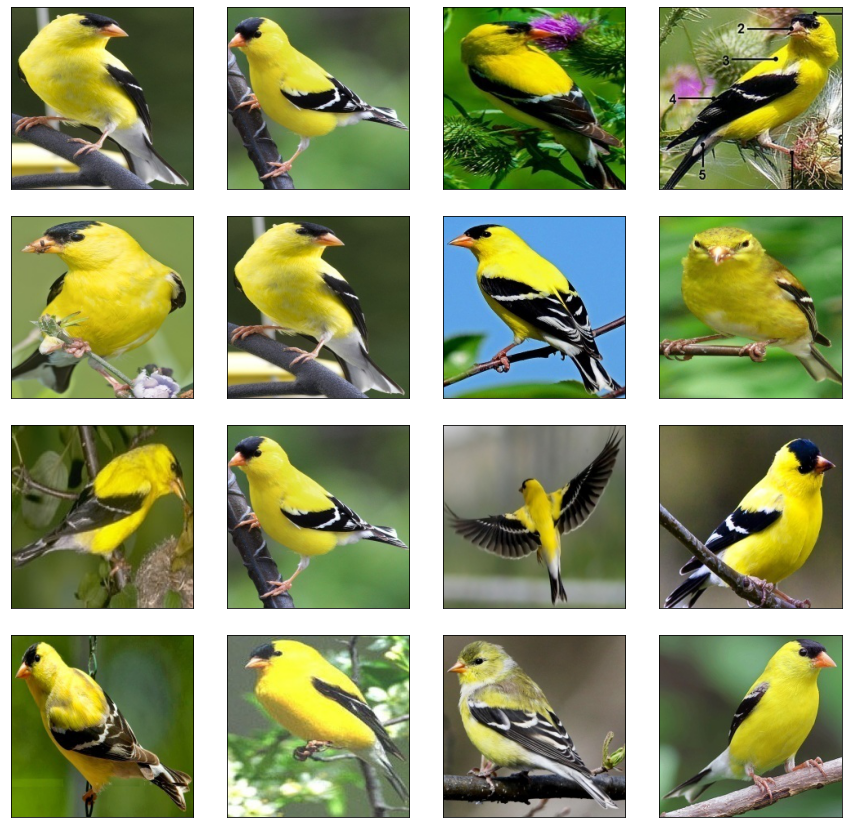

In [4]:
plt.figure(figsize=(12,12))
for i in range(1,17):
    path = "Data/Bird Speciees Dataset/AMERICAN GOLDFINCH"
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.xticks([])
    plt.yticks([])

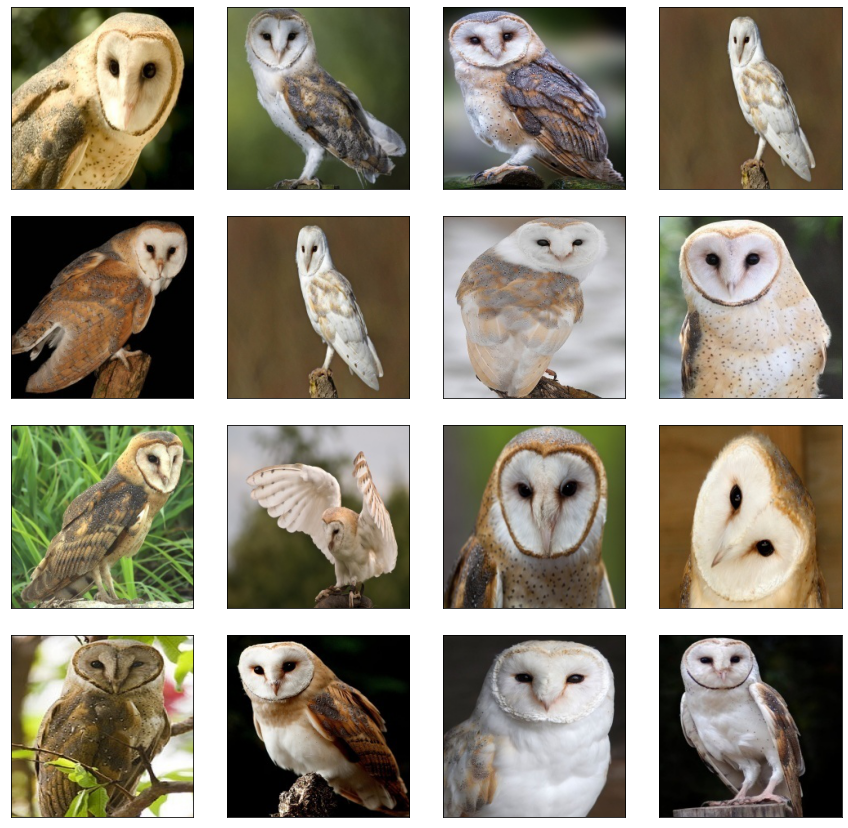

In [5]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
for i in range(1,17):
    path = "Data/Bird Speciees Dataset/BARN OWL"
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.xticks([])
    plt.yticks([])

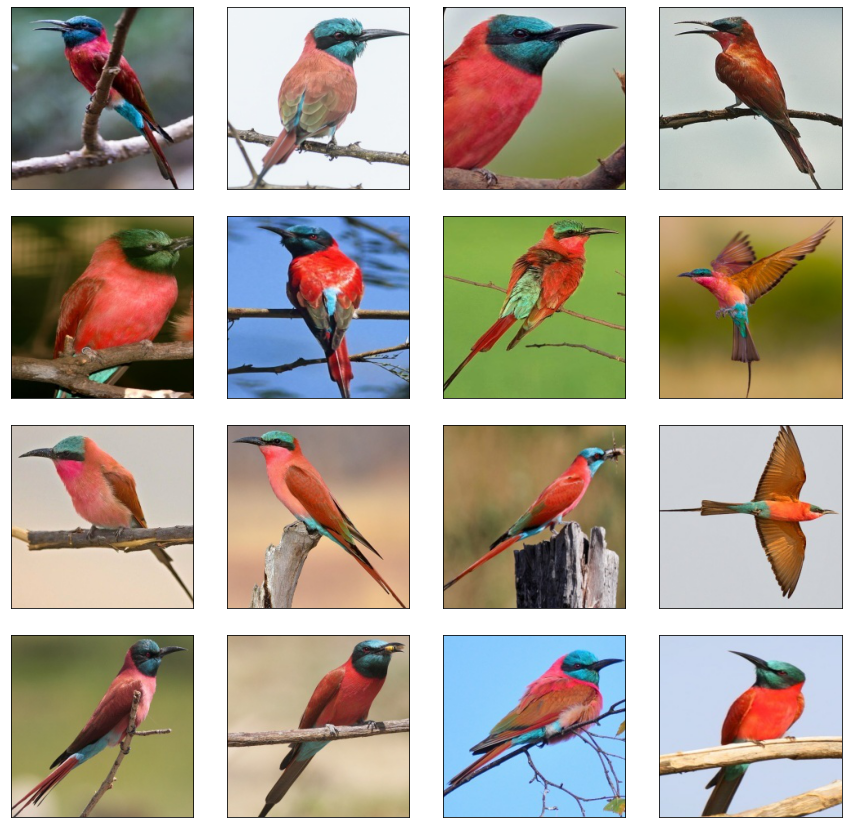

In [6]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
for i in range(1,17):
    path = "Data/Bird Speciees Dataset/CARMINE BEE-EATER"
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.xticks([])
    plt.yticks([])

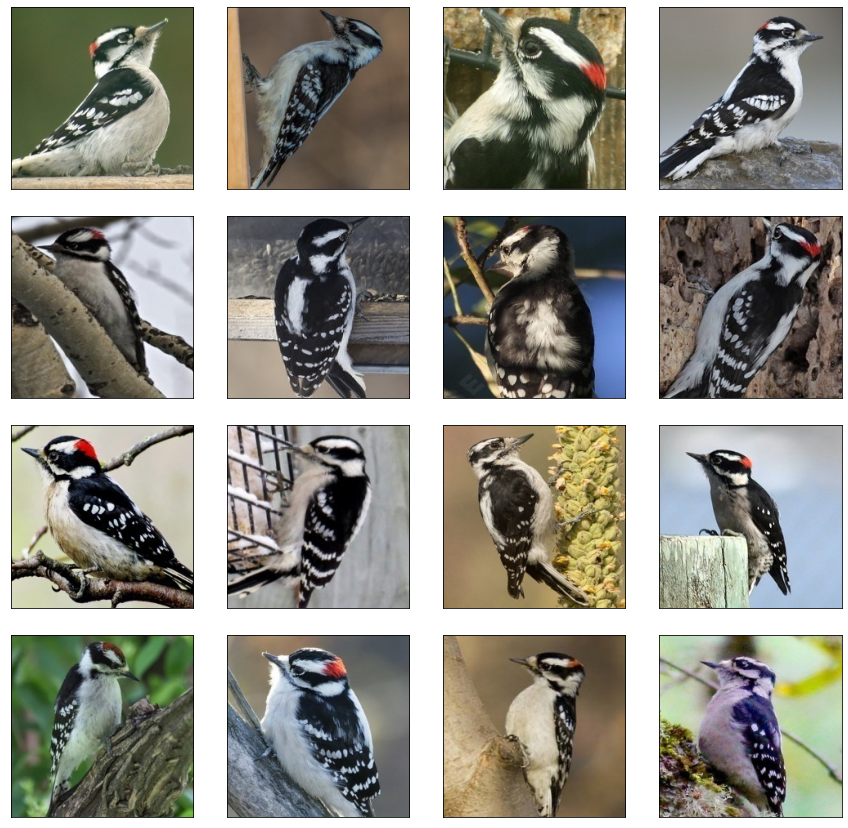

In [7]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
for i in range(1,17):
    path = "Data/Bird Speciees Dataset/DOWNY WOODPECKER"
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.xticks([])
    plt.yticks([])

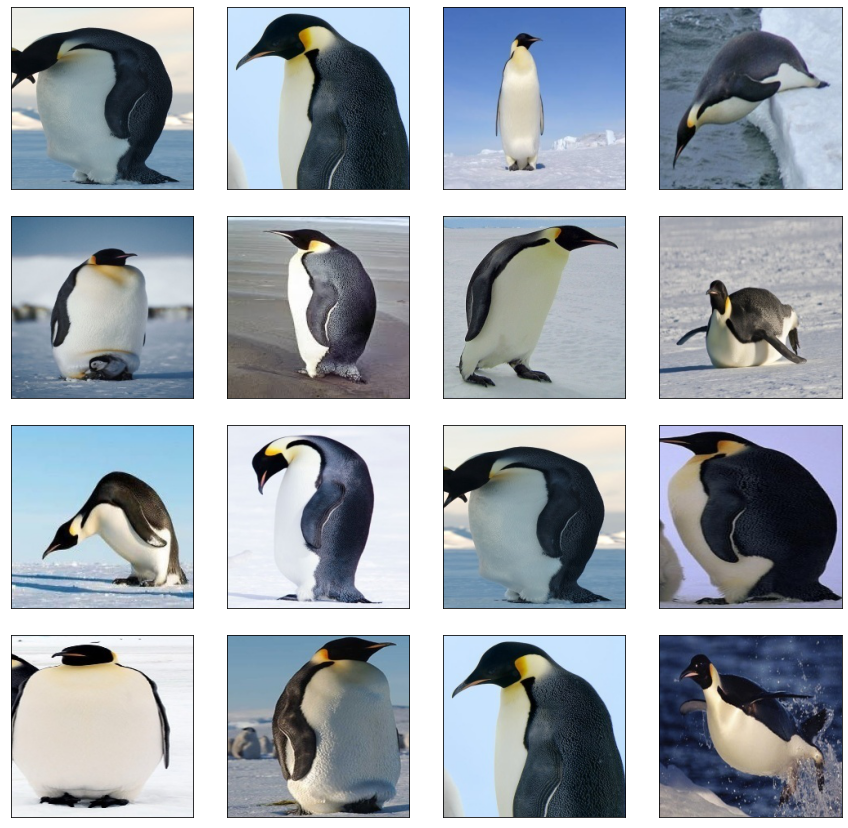

In [8]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
for i in range(1,17):
    path = "Data/Bird Speciees Dataset/EMPEROR PENGUIN"
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.xticks([])
    plt.yticks([])

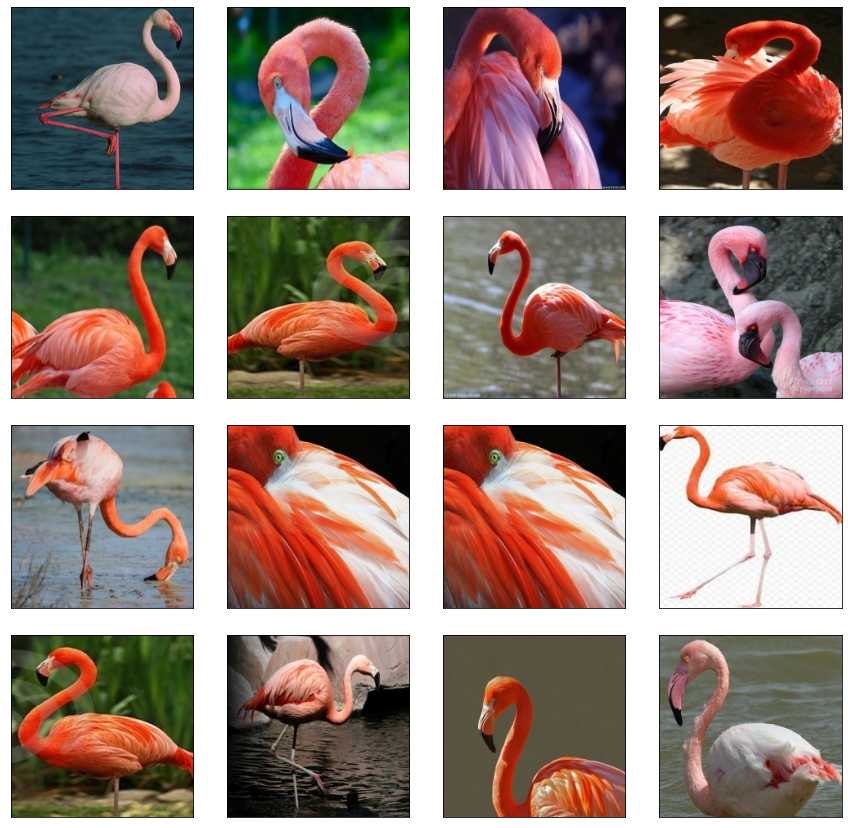

In [97]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
for i in range(1,17):
    path = "Data/Bird Speciees Dataset/FLAMINGO"
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.xticks([])
    plt.yticks([])

<a id='4'></a>
# Data Preprocessing

In [98]:
# Setting path and creating empty list
dir = "Data/Bird Speciees Dataset"
root_dir = listdir(dir)
image_list, label_list = [], []

In [99]:
root_dir

['AMERICAN GOLDFINCH',
 'BARN OWL',
 'CARMINE BEE-EATER',
 'DOWNY WOODPECKER',
 'EMPEROR PENGUIN',
 'FLAMINGO']

In [100]:
# Reading and converting image to numpy array
for directory in root_dir:
  for files in listdir(f"{dir}/{directory}"):
    image_path = f"{dir}/{directory}/{files}"
    image = cv2.imread(image_path)
    image = img_to_array(image)
    image_list.append(image)
    label_list.append(directory)

In [101]:
image_list[0]

array([[[ 93., 109., 116.],
        [ 94., 110., 117.],
        [ 95., 111., 118.],
        ...,
        [ 96., 111., 120.],
        [ 96., 112., 119.],
        [ 98., 114., 121.]],

       [[ 93., 109., 116.],
        [ 94., 110., 117.],
        [ 94., 110., 117.],
        ...,
        [ 94., 109., 118.],
        [ 95., 111., 118.],
        [ 96., 112., 119.]],

       [[ 93., 108., 117.],
        [ 94., 109., 118.],
        [ 93., 108., 117.],
        ...,
        [ 97., 112., 121.],
        [ 98., 114., 121.],
        [ 99., 115., 122.]],

       ...,

       [[ 78.,  94.,  93.],
        [ 77.,  93.,  92.],
        [ 76.,  91.,  93.],
        ...,
        [153., 156., 161.],
        [153., 156., 161.],
        [153., 156., 161.]],

       [[ 83.,  97.,  96.],
        [ 81.,  95.,  94.],
        [ 77.,  92.,  94.],
        ...,
        [153., 156., 160.],
        [153., 156., 160.],
        [152., 155., 159.]],

       [[ 84.,  98.,  97.],
        [ 82.,  96.,  95.],
        [ 77.,  

In [102]:
label_list[0:4]

['AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH',
 'AMERICAN GOLDFINCH']

In [103]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

AMERICAN GOLDFINCH    143
EMPEROR PENGUIN       139
DOWNY WOODPECKER      137
FLAMINGO              132
CARMINE BEE-EATER     131
BARN OWL              129
dtype: int64

In [104]:
# Storing number of classes
num_classes = len(label_counts)
num_classes

6

In [105]:
# Checking input image shape
image_list[0].shape

(224, 224, 3)

In [106]:
# Checking labels shape 
label_list = np.array(label_list)
label_list.shape

(811,)

<a id='5'></a>
# Spliting the data into Training and Testing 

In [107]:
# Splitting dataset
x_train, x_val_test, y_train, y_val_test = train_test_split(image_list, label_list, test_size=0.4, random_state = 10)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5, random_state = 10)

In [108]:
print(f"Number of Training dataset: {len(x_train)}\nNumber of Validation dataset: {len(x_val)}\nNumber of Testing dataset: {len(x_test)}")

Number of Training dataset: 486
Number of Validation dataset: 162
Number of Testing dataset: 163


<a id='6'></a>
# Normalization and Reshaping

In [109]:
# Normalize and reshape data
x_train = np.array(x_train, dtype=np.float16) / 255.0
x_val = np.array(x_val, dtype=np.float16) / 255.0
x_test = np.array(x_test, dtype=np.float16) / 255.0

x_train = x_train.reshape( -1, 224,224,3) 
x_val = x_val.reshape( -1, 224,224,3) 
x_test = x_test.reshape( -1, 224,224,3) 

In [110]:
x_train[0]

array([[[0.02353 , 0.051   , 0.0392  ],
        [0.02353 , 0.051   , 0.0392  ],
        [0.0196  , 0.04706 , 0.0353  ],
        ...,
        [0.00784 , 0.098   , 0.06665 ],
        [0.00392 , 0.0941  , 0.06274 ],
        [0.      , 0.0902  , 0.05884 ]],

       [[0.02745 , 0.0549  , 0.04315 ],
        [0.02353 , 0.051   , 0.0392  ],
        [0.0196  , 0.04706 , 0.0353  ],
        ...,
        [0.01569 , 0.1059  , 0.0745  ],
        [0.011765, 0.0941  , 0.06274 ],
        [0.      , 0.0902  , 0.05884 ]],

       [[0.02745 , 0.0549  , 0.04315 ],
        [0.02353 , 0.051   , 0.0392  ],
        [0.0196  , 0.04706 , 0.0353  ],
        ...,
        [0.02745 , 0.1098  , 0.0745  ],
        [0.02353 , 0.098   , 0.06274 ],
        [0.00784 , 0.0902  , 0.0549  ]],

       ...,

       [[0.102   , 0.1372  , 0.153   ],
        [0.0863  , 0.1216  , 0.1372  ],
        [0.1137  , 0.153   , 0.1804  ],
        ...,
        [0.02353 , 0.08234 , 0.06665 ],
        [0.0196  , 0.0784  , 0.06274 ],
        [

<a id='7'></a>
# Label Binarizing

In [111]:
# Label binarizing to one hot encode the target variables
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_val = lb.fit_transform(y_val)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']


In [112]:
y_train

array([[0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]])

In [91]:
y_train.shape

(486, 6)

<a id='8'></a>
# ANN

**Build and Train ANN**

In [26]:
def load_model(): 
    model = Sequential([
        Flatten(input_shape=(224,224,3)),
        Dense(512, activation ='relu'),
        Dense(256, activation ='relu'),
        Dense(128, activation ='relu'),
        Dense(num_classes, activation='softmax'),
    ])
    model.compile(
        optimizer= Adam(learning_rate=0.0005),
        loss='categorical_crossentropy',
        metrics=['acc'],
    )
    return model
    
    
early_stopping = callbacks.EarlyStopping(
        patience=10,
        min_delta=0,
        monitor='val_loss',
        restore_best_weights=True,
        verbose=0,
        mode='min', 
        baseline=None,
    )
plateau = callbacks.ReduceLROnPlateau(
            monitor='val_loss', 
            factor=0.2, 
            patience=4, 
            verbose=0,
            mode='min')

ann_model = load_model()
history_ann = ann_model.fit(  x_train , y_train,
                validation_data = (x_val , y_val),
                epochs = 1000,
                callbacks = [early_stopping , plateau],
              )

Epoch 1/1000
17/17 [==============================] - 11s 519ms/step - loss: 34.5133 - acc: 0.1641 - val_loss: 13.4078 - val_acc: 0.1902 - lr: 5.0000e-04
Epoch 2/1000
17/17 [==============================] - 8s 452ms/step - loss: 9.2256 - acc: 0.3359 - val_loss: 5.2170 - val_acc: 0.3681 - lr: 5.0000e-04
Epoch 3/1000
17/17 [==============================] - 8s 461ms/step - loss: 2.7043 - acc: 0.4826 - val_loss: 2.2507 - val_acc: 0.5706 - lr: 5.0000e-04
Epoch 4/1000
17/17 [==============================] - 7s 426ms/step - loss: 2.6239 - acc: 0.5097 - val_loss: 5.1982 - val_acc: 0.4049 - lr: 5.0000e-04
Epoch 5/1000
17/17 [==============================] - 7s 417ms/step - loss: 3.6144 - acc: 0.4691 - val_loss: 4.1944 - val_acc: 0.3129 - lr: 5.0000e-04
Epoch 6/1000
17/17 [==============================] - 7s 434ms/step - loss: 2.6400 - acc: 0.5560 - val_loss: 2.7307 - val_acc: 0.5153 - lr: 5.0000e-04
Epoch 7/1000
17/17 [==============================] - 8s 439ms/step - loss: 1.7225 - acc: 0

**loss curve**

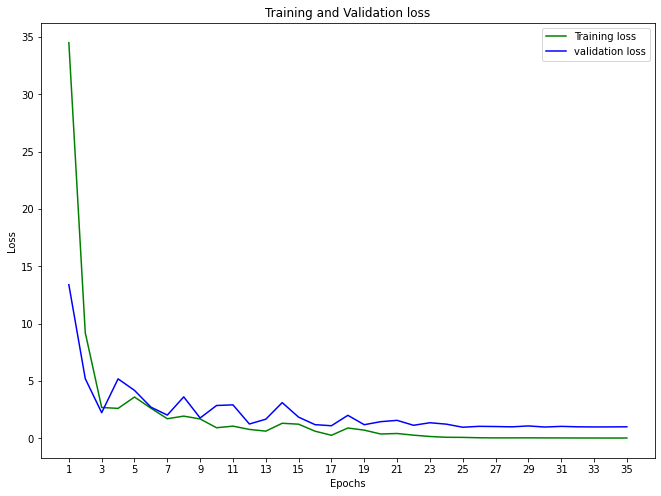

In [28]:
plt.figure(figsize=(11,8))
loss_train = history_ann.history['loss']
loss_val = history_ann.history['val_loss']
epochs = range(1,36)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(1,36,2))
plt.legend()
plt.show()

**Acc curve**

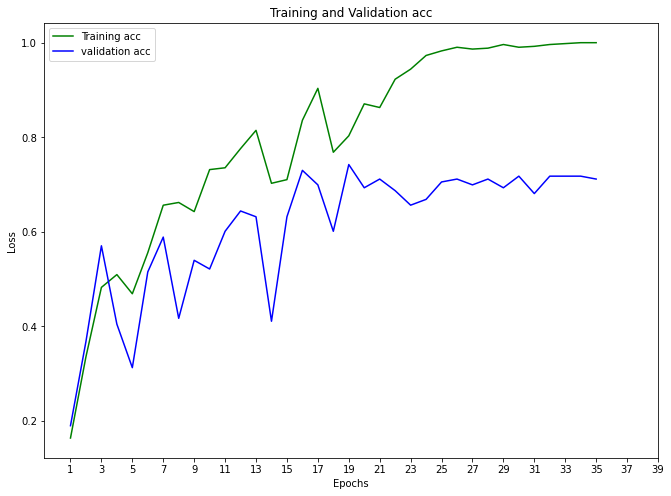

In [29]:
plt.figure(figsize=(11,8))
loss_train = history_ann.history['acc']
loss_val = history_ann.history['val_acc']
epochs = range(1,36)
plt.plot(epochs, loss_train, 'g', label='Training acc')
plt.plot(epochs, loss_val, 'b', label='validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(1,40,2))
plt.legend()
plt.show()

<a id='9'></a>
# CNN

In [113]:
def load_model():
    model = Sequential([
        Conv2D(8, (3, 3), padding="same",input_shape=(224,224,3), activation="relu"),
        MaxPooling2D(pool_size=(3, 3)),
        Conv2D(16, (3, 3), padding="same", activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (3, 3), padding="same", activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation ='relu'),
        Dense(num_classes, activation="softmax")    
    ])
    model.compile(
        Adam(learning_rate=0.0005),
        loss = 'categorical_crossentropy',
        metrics = ['acc']
    )
    return model

early_stopping = callbacks.EarlyStopping(
        patience=10,
        monitor='val_loss',
        restore_best_weights=True,
        verbose=0,
        mode='min', 
    )
plateau = callbacks.ReduceLROnPlateau(
            monitor='val_loss', 
            factor=0.2, 
            patience=4, 
            verbose=0,
            mode='min')

nn_model = load_model()
history = nn_model.fit(  x_train , y_train,
                validation_data = (x_val , y_val),
                epochs = 1000,
                callbacks = [early_stopping , plateau],
              )

Epoch 1/1000
16/16 [==============================] - 4s 206ms/step - loss: 1.7507 - acc: 0.2510 - val_loss: 1.5079 - val_acc: 0.5185 - lr: 5.0000e-04
Epoch 2/1000
16/16 [==============================] - 3s 203ms/step - loss: 1.2431 - acc: 0.6379 - val_loss: 0.9728 - val_acc: 0.7222 - lr: 5.0000e-04
Epoch 3/1000
16/16 [==============================] - 4s 234ms/step - loss: 0.7825 - acc: 0.7387 - val_loss: 0.6971 - val_acc: 0.7593 - lr: 5.0000e-04
Epoch 4/1000
16/16 [==============================] - 4s 222ms/step - loss: 0.5645 - acc: 0.8066 - val_loss: 0.6225 - val_acc: 0.7778 - lr: 5.0000e-04
Epoch 5/1000
16/16 [==============================] - 4s 223ms/step - loss: 0.4303 - acc: 0.8498 - val_loss: 0.5892 - val_acc: 0.7593 - lr: 5.0000e-04
Epoch 6/1000
16/16 [==============================] - 4s 230ms/step - loss: 0.3376 - acc: 0.8951 - val_loss: 0.5528 - val_acc: 0.8210 - lr: 5.0000e-04
Epoch 7/1000
16/16 [==============================] - 4s 232ms/step - loss: 0.2633 - acc: 0.93

**Loss Curve**

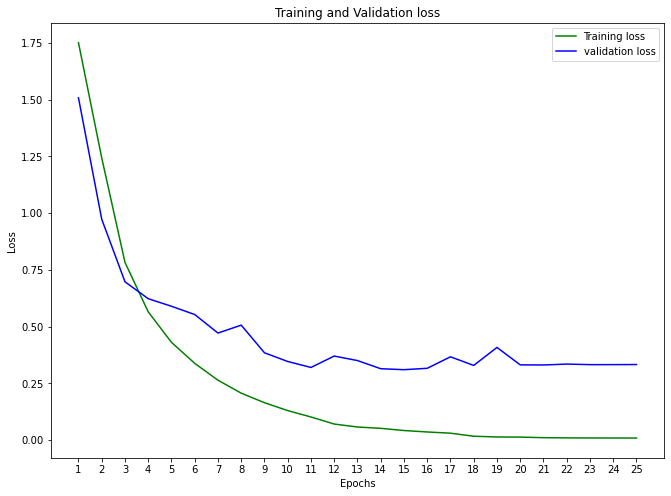

In [114]:
plt.figure(figsize=(11,8))
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,26)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(1,26))
plt.legend()
plt.show()

**ACC Curve**

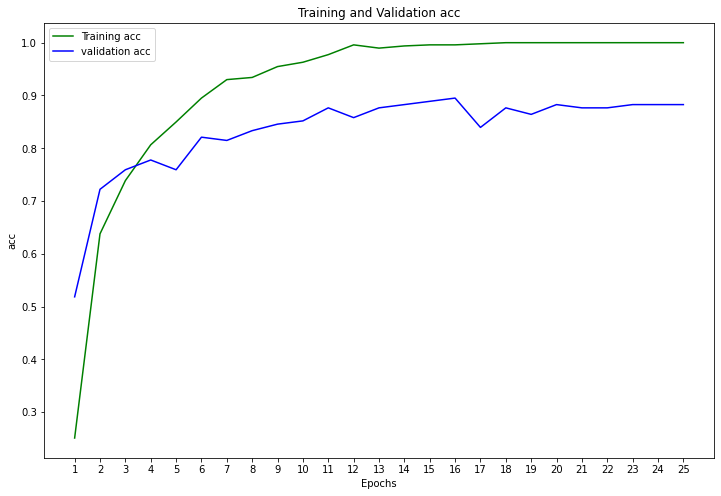

In [115]:
#Plot the Accuarcy history
plt.figure(figsize=(12,8))
loss_train = history.history['acc']
loss_val = history.history['val_acc']
epochs = range(1,26)
plt.plot(epochs, loss_train, 'g', label='Training acc')
plt.plot(epochs, loss_val, 'b', label='validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.xticks(np.arange(1,26))
plt.legend()
plt.show()

**Model Score on Testing Data**

In [116]:
nn_model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 57ms/step - loss: 0.3270 - acc: 0.9018


[0.3269978165626526, 0.9018405079841614]

In [117]:
x_train, x_val_test, y_train, y_val_test = train_test_split(image_list, label_list, test_size=0.4, random_state = 10)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5, random_state = 10)

In [119]:
x_train = np.array(x_train, dtype=np.float16) / 255.0
x_val = np.array(x_val, dtype=np.float16) / 255.0
x_test = np.array(x_test, dtype=np.float16) / 255.0

x_train = x_train.reshape( -1, 224,224,3) 
x_val = x_val.reshape( -1, 224,224,3) 
x_test = x_test.reshape( -1, 224,224,3) 

In [120]:
x_test.shape

(163, 224, 224, 3)

In [121]:
x_train.shape

(486, 224, 224, 3)

In [122]:
y_test.shape

(163,)

In [123]:
y_pred = nn_model.predict(x_test)

In [124]:
y_predicted_labels = [np.argmax(i) for i in y_pred]

In [125]:
y_predicted_labels = np.array(y_predicted_labels)
y_predicted_labels.shape

(163,)

In [126]:
y_predicted_labels

array([2, 0, 2, 3, 5, 5, 3, 2, 2, 4, 4, 3, 0, 2, 4, 5, 5, 5, 0, 4, 4, 1,
       1, 2, 4, 2, 1, 1, 1, 3, 4, 5, 2, 2, 2, 0, 4, 1, 1, 5, 1, 2, 4, 3,
       0, 0, 2, 2, 1, 1, 2, 3, 5, 3, 1, 3, 1, 3, 1, 3, 0, 2, 4, 4, 2, 4,
       0, 5, 0, 3, 1, 4, 0, 0, 5, 2, 5, 2, 1, 5, 4, 4, 5, 0, 5, 2, 0, 3,
       5, 2, 3, 3, 0, 2, 1, 3, 1, 4, 0, 3, 1, 0, 1, 3, 4, 2, 2, 1, 3, 2,
       1, 2, 2, 1, 4, 1, 1, 0, 4, 4, 3, 5, 3, 3, 1, 2, 0, 0, 2, 4, 1, 3,
       4, 4, 0, 0, 1, 4, 2, 3, 4, 2, 0, 2, 4, 3, 0, 0, 0, 1, 4, 0, 1, 5,
       5, 1, 1, 5, 1, 1, 1, 0, 3], dtype=int64)

In [127]:
y_test

array(['CARMINE BEE-EATER', 'AMERICAN GOLDFINCH', 'CARMINE BEE-EATER',
       'DOWNY WOODPECKER', 'FLAMINGO', 'FLAMINGO', 'DOWNY WOODPECKER',
       'CARMINE BEE-EATER', 'CARMINE BEE-EATER', 'EMPEROR PENGUIN',
       'EMPEROR PENGUIN', 'DOWNY WOODPECKER', 'AMERICAN GOLDFINCH',
       'CARMINE BEE-EATER', 'EMPEROR PENGUIN', 'FLAMINGO', 'FLAMINGO',
       'FLAMINGO', 'AMERICAN GOLDFINCH', 'DOWNY WOODPECKER',
       'EMPEROR PENGUIN', 'BARN OWL', 'BARN OWL', 'FLAMINGO',
       'EMPEROR PENGUIN', 'CARMINE BEE-EATER', 'CARMINE BEE-EATER',
       'BARN OWL', 'AMERICAN GOLDFINCH', 'DOWNY WOODPECKER',
       'EMPEROR PENGUIN', 'FLAMINGO', 'CARMINE BEE-EATER',
       'CARMINE BEE-EATER', 'CARMINE BEE-EATER', 'AMERICAN GOLDFINCH',
       'DOWNY WOODPECKER', 'BARN OWL', 'BARN OWL', 'FLAMINGO', 'BARN OWL',
       'CARMINE BEE-EATER', 'EMPEROR PENGUIN', 'DOWNY WOODPECKER',
       'AMERICAN GOLDFINCH', 'AMERICAN GOLDFINCH', 'CARMINE BEE-EATER',
       'CARMINE BEE-EATER', 'BARN OWL', 'BARN OWL', 'CA

In [128]:
y_test = np.where(y_test == 'EMPEROR PENGUIN', 4, y_test) 
y_test = np.where(y_test == 'BARN OWL', 1, y_test) 
y_test = np.where(y_test == 'AMERICAN GOLDFINCH', 0, y_test) 
y_test = np.where(y_test == 'DOWNY WOODPECKER', 3, y_test) 
y_test = np.where(y_test == 'FLAMINGO', 5, y_test) 
y_test = np.where(y_test == 'CARMINE BEE-EATER', 2, y_test)
y_test

array(['2', '0', '2', '3', '5', '5', '3', '2', '2', '4', '4', '3', '0',
       '2', '4', '5', '5', '5', '0', '3', '4', '1', '1', '5', '4', '2',
       '2', '1', '0', '3', '4', '5', '2', '2', '2', '0', '3', '1', '1',
       '5', '1', '2', '4', '3', '0', '0', '2', '2', '1', '1', '2', '3',
       '5', '3', '1', '3', '1', '3', '1', '3', '0', '2', '4', '4', '2',
       '4', '0', '5', '0', '3', '1', '4', '0', '0', '5', '2', '5', '5',
       '1', '5', '4', '4', '5', '0', '5', '2', '0', '3', '5', '2', '3',
       '3', '0', '2', '1', '3', '1', '4', '0', '3', '1', '0', '3', '3',
       '4', '2', '2', '1', '3', '2', '1', '1', '2', '1', '4', '1', '5',
       '0', '4', '4', '3', '5', '3', '3', '1', '2', '0', '0', '2', '3',
       '1', '3', '4', '4', '0', '0', '1', '4', '5', '3', '4', '2', '0',
       '2', '4', '3', '0', '0', '5', '0', '4', '0', '5', '5', '5', '1',
       '1', '5', '1', '3', '5', '0', '3'], dtype='<U18')

In [129]:
y_test = y_test.astype('int32')
y_test

array([2, 0, 2, 3, 5, 5, 3, 2, 2, 4, 4, 3, 0, 2, 4, 5, 5, 5, 0, 3, 4, 1,
       1, 5, 4, 2, 2, 1, 0, 3, 4, 5, 2, 2, 2, 0, 3, 1, 1, 5, 1, 2, 4, 3,
       0, 0, 2, 2, 1, 1, 2, 3, 5, 3, 1, 3, 1, 3, 1, 3, 0, 2, 4, 4, 2, 4,
       0, 5, 0, 3, 1, 4, 0, 0, 5, 2, 5, 5, 1, 5, 4, 4, 5, 0, 5, 2, 0, 3,
       5, 2, 3, 3, 0, 2, 1, 3, 1, 4, 0, 3, 1, 0, 3, 3, 4, 2, 2, 1, 3, 2,
       1, 1, 2, 1, 4, 1, 5, 0, 4, 4, 3, 5, 3, 3, 1, 2, 0, 0, 2, 3, 1, 3,
       4, 4, 0, 0, 1, 4, 5, 3, 4, 2, 0, 2, 4, 3, 0, 0, 5, 0, 4, 0, 5, 5,
       5, 1, 1, 5, 1, 3, 5, 0, 3])

**Confusion Matrix**

In [130]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(6, 6), dtype=int32, numpy=
array([[26,  2,  0,  0,  0,  0],
       [ 0, 26,  1,  0,  0,  0],
       [ 0,  1, 27,  0,  0,  0],
       [ 0,  2,  0, 25,  3,  0],
       [ 0,  0,  0,  0, 24,  0],
       [ 1,  3,  3,  0,  0, 19]])>

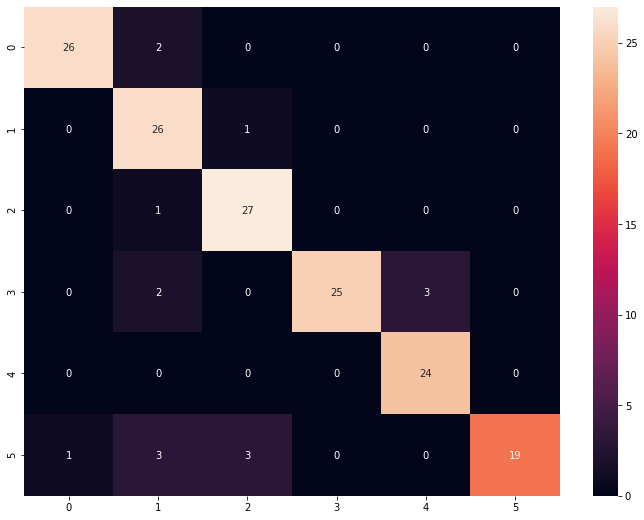

In [134]:
plt.figure(figsize=(12,9))
sns.heatmap(cm, annot=True)
plt.savefig('Confusion_matrix.png', )

**Classification Report**

In [135]:
print(classification_report(y_test, y_predicted_labels))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        28
           1       0.76      0.96      0.85        27
           2       0.87      0.96      0.92        28
           3       1.00      0.83      0.91        30
           4       0.89      1.00      0.94        24
           5       1.00      0.73      0.84        26

    accuracy                           0.90       163
   macro avg       0.91      0.90      0.90       163
weighted avg       0.92      0.90      0.90       163



**CNN Score**

# Evaluation

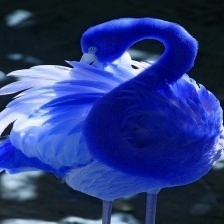

In [138]:
# Plotting image to compare
img = array_to_img(x_test[5])
img

In [144]:
# Finding max value from predition list and comaparing original value vs predicted
labels = lb.classes_
print(labels)
print("Originally : ",labels[np.argmax(y_pred[5])])
print("Predicted : ",labels[np.argmax(y_pred[5])])

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']
Originally :  FLAMINGO
Predicted :  FLAMINGO
